In [1]:
!pip install -Uqq fastbook

In [4]:
from fastai.vision.all import *
from fastbook import *

In [5]:
url = search_images_ddg('grizzly bear', max_images = 1)[0]
download_url(url, Path('grizzly.jpg'))

Path('grizzly.jpg')

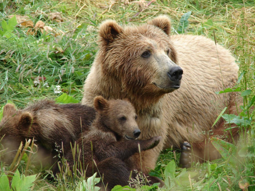

In [6]:
Image.open('grizzly.jpg').to_thumb(255)

In [7]:
url  = search_images_ddg('black bear', max_images = 1)[0]
download_url(url, Path('black.jpg'))

Path('black.jpg')

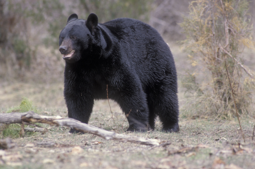

In [8]:
Image.open('black.jpg').to_thumb(255)

In [9]:
url  = search_images_ddg('teddy bear', max_images = 1)[0]
download_url(url, Path('teddy.jpg'))

Path('teddy.jpg')

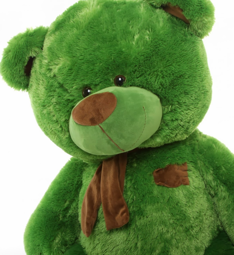

In [10]:
Image.open('teddy.jpg').to_thumb(255)

In [14]:
list(zip([1, 2, 3], [4, 5, 6]))

[(1, 4), (2, 5), (3, 6)]

In [20]:
searches = ['grizzly', 'black', 'teddy']
path = Path('images')

for search in searches:
    dest = path / search
    dest.mkdir(parents = True, exist_ok = True)
    urls = search_images_ddg(f'{search} bear')
    download_images(dest, urls = urls)

In [23]:
len(list(path.glob('*/*')))

756

In [24]:
len(list(path.glob('grizzly/*')))

372

In [25]:
failed = verify_images(get_image_files(path))
len(failed)

31

In [26]:
failed.map(Path.unlink)

(#31) [None,None,None,None,None,None,None,None,None,None...]

In [27]:
len(list(path.glob('*/*')))

725

In [42]:
bear = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = parent_label,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    item_tfms = Resize(128)
)

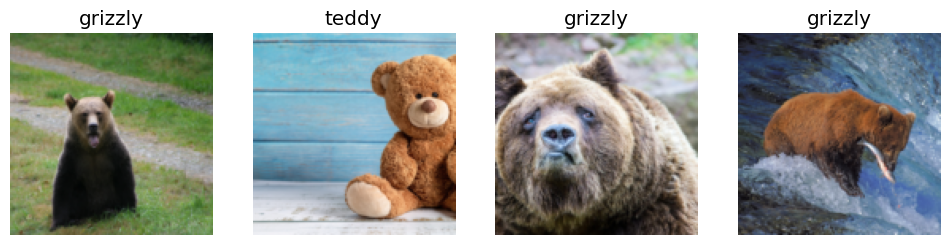

In [43]:
dls = bear.dataloaders(path)
dls.train.show_batch(max_n = 4, nrows = 1)

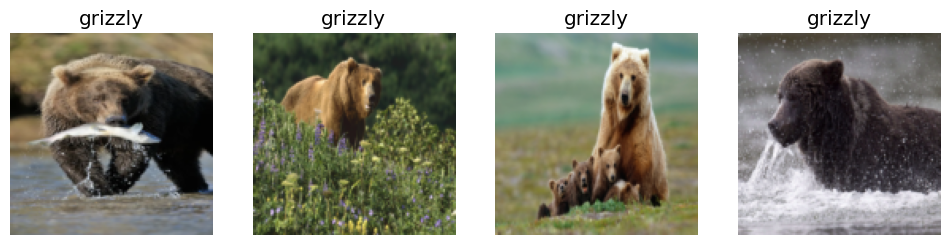

In [44]:
bear = bear.new(item_tfms = Resize(128, ResizeMethod.Squish))
dls = bear.dataloaders(path)
dls.train.show_batch(max_n = 4, nrows = 1)

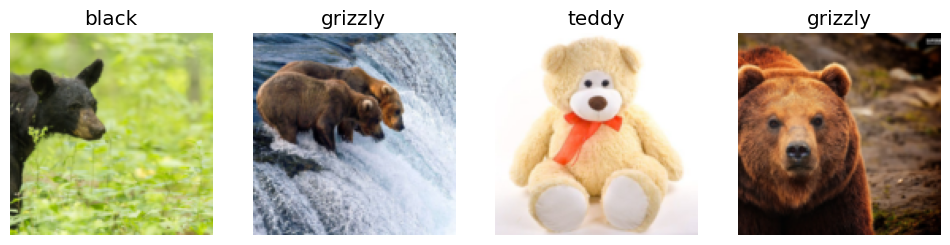

In [45]:
bear = bear.new(item_tfms = Resize(128, ResizeMethod.Crop))
dls = bear.dataloaders(path)
dls.train.show_batch(max_n = 4, nrows = 1)

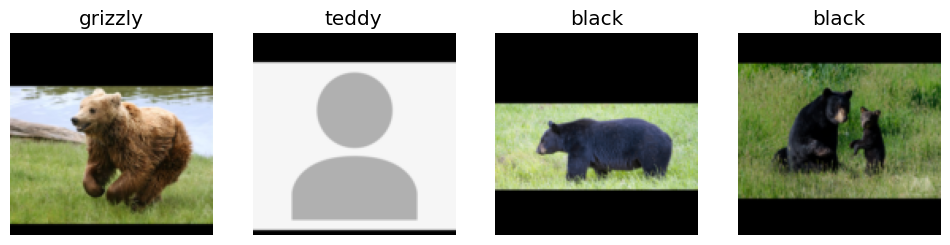

In [50]:
bear = bear.new(item_tfms = Resize(128, ResizeMethod.Pad, pad_mode = 'zeros'))
dls = bear.dataloaders(path)
dls.train.show_batch(max_n = 4, nrows = 1)

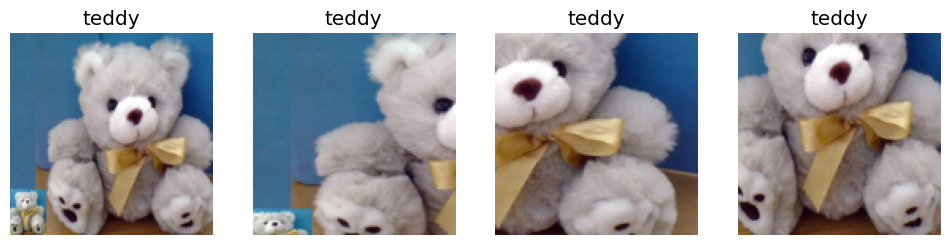

In [54]:
bear = bear.new(item_tfms = RandomResizedCrop(128, min_scale = 0.3))
dls = bear.dataloaders(path)
dls.train.show_batch(max_n = 4, nrows = 1, unique = True)

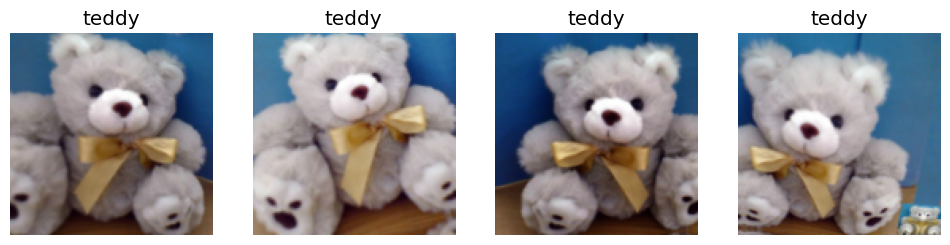

In [58]:
bear = bear.new(item_tfms = Resize(128), batch_tfms = aug_transforms())
dls = bear.dataloaders(path)
dls.train.show_batch(max_n = 4, nrows = 1, unique = True)

In [59]:
bear = bear.new(
    item_tfms = RandomResizedCrop(224, min_scale = 0.5),
    batch_tfms = aug_transforms()
)
dls = bear.dataloaders(path)

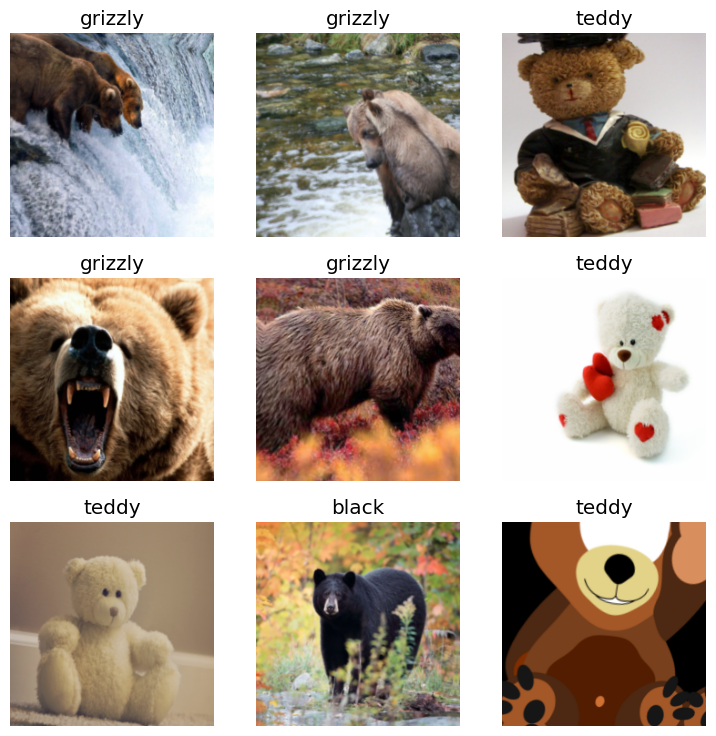

In [60]:
dls.show_batch()

In [61]:
learn = vision_learner(dls, resnet18, metrics = accuracy)
learn.fine_tune(4)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 256MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.009766,0.289369,0.944444,00:23


epoch,train_loss,valid_loss,accuracy,time
0,0.238100,0.268377,0.944444,00:22
1,0.192095,0.275599,0.944444,00:22
2,0.148744,0.261337,0.958333,00:22
3,0.122645,0.249564,0.951389,00:22


In [63]:
learn.predict('black.jpg')

('black', tensor(0), tensor([9.9964e-01, 3.2093e-04, 4.2989e-05]))

In [64]:
learn.predict('grizzly.jpg')

('grizzly', tensor(1), tensor([1.3722e-04, 9.9981e-01, 4.9776e-05]))

In [65]:
learn.predict('teddy.jpg')

('teddy', tensor(2), tensor([1.9958e-06, 1.0846e-11, 1.0000e+00]))

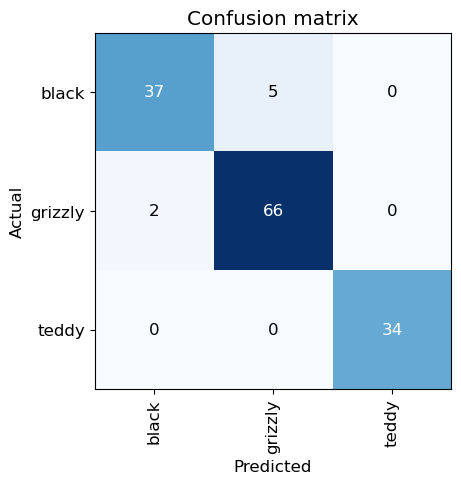

In [66]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

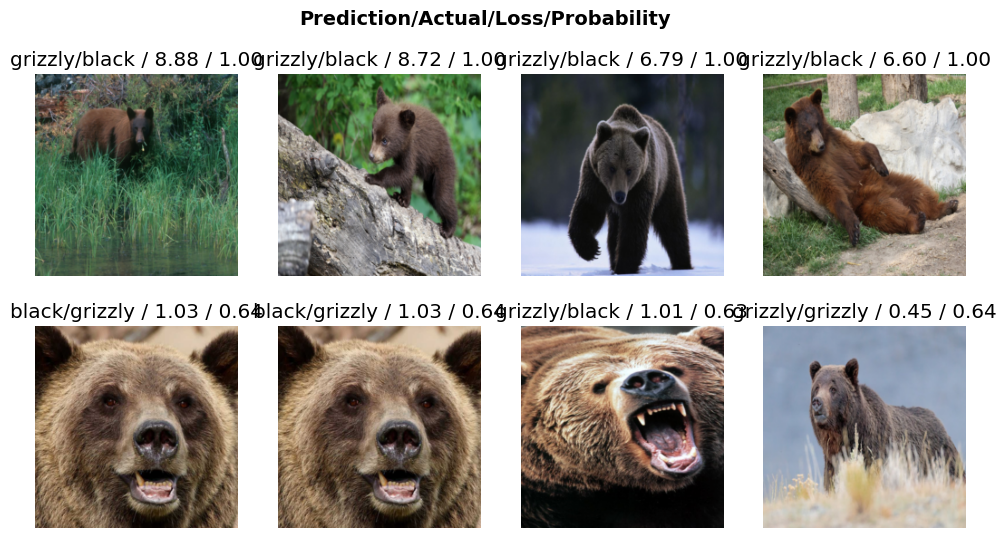

In [67]:
interp.plot_top_losses(8)

In [69]:
from fastai.vision.widgets import *

In [99]:
cleaner = ImageClassifierCleaner(learn)
cleaner

FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 1.
Original Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 41, in fetch
    data = next(self.dataset_iter)
  File "/opt/conda/lib/python3.10/site-packages/fastai/data/load.py", line 138, in create_batches
    yield from map(self.do_batch, self.chunkify(res))
  File "/opt/conda/lib/python3.10/site-packages/fastcore/basics.py", line 230, in chunked
    res = list(itertools.islice(it, chunk_sz))
  File "/opt/conda/lib/python3.10/site-packages/fastai/data/load.py", line 153, in do_item
    try: return self.after_item(self.create_item(s))
  File "/opt/conda/lib/python3.10/site-packages/fastai/data/load.py", line 160, in create_item
    if self.indexed: return self.dataset[s or 0]
  File "/opt/conda/lib/python3.10/site-packages/fastai/data/core.py", line 458, in __getitem__
    res = tuple([tl[it] for tl in self.tls])
  File "/opt/conda/lib/python3.10/site-packages/fastai/data/core.py", line 458, in <listcomp>
    res = tuple([tl[it] for tl in self.tls])
  File "/opt/conda/lib/python3.10/site-packages/fastai/data/core.py", line 417, in __getitem__
    return self._after_item(res) if is_indexer(idx) else res.map(self._after_item)
  File "/opt/conda/lib/python3.10/site-packages/fastai/data/core.py", line 377, in _after_item
    def _after_item(self, o): return self.tfms(o)
  File "/opt/conda/lib/python3.10/site-packages/fastcore/transform.py", line 208, in __call__
    def __call__(self, o): return compose_tfms(o, tfms=self.fs, split_idx=self.split_idx)
  File "/opt/conda/lib/python3.10/site-packages/fastcore/transform.py", line 158, in compose_tfms
    x = f(x, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/fastcore/transform.py", line 81, in __call__
    def __call__(self, x, **kwargs): return self._call('encodes', x, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/fastcore/transform.py", line 91, in _call
    return self._do_call(getattr(self, fn), x, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/fastcore/transform.py", line 97, in _do_call
    return retain_type(f(x, **kwargs), x, ret)
  File "/opt/conda/lib/python3.10/site-packages/fastcore/dispatch.py", line 120, in __call__
    return f(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/fastai/vision/core.py", line 125, in create
    return cls(load_image(fn, **merge(cls._open_args, kwargs)))
  File "/opt/conda/lib/python3.10/site-packages/fastai/vision/core.py", line 98, in load_image
    im = Image.open(fn)
  File "/opt/conda/lib/python3.10/site-packages/PIL/Image.py", line 3236, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/images/black/0d9d1b7a-a9ef-405f-9859-496cafab50da.jpg'


In [94]:
list(cleaner.delete())

[1, 2, 14, 19]

In [95]:
list(cleaner.change())

[]

In [97]:
for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[0]), path/cat)
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [85]:
cleaner.fns[0]

Path('images/black/92549b34-7966-4125-bb43-312873b06e51.jpg')

In [87]:
path/'grizzly'

Path('images/grizzly')

In [100]:
learn.predict('grizzly.jpg')

('grizzly', tensor(1), tensor([1.3722e-04, 9.9981e-01, 4.9776e-05]))

In [101]:
learn.export('model.pkl')

In [102]:
model = load_learner('/kaggle/working/model.pkl')

In [103]:
model.predict('grizzly.jpg')

('grizzly', tensor(1), tensor([1.3722e-04, 9.9981e-01, 4.9776e-05]))

In [111]:
name, idx, prob = model.predict('black.jpg')

In [120]:
name

'black'

In [116]:
float(prob[idx])

0.9996360540390015

In [122]:
dict(zip(model.dls.vocab, [float(i) for i in prob]))

{'black': 0.9996360540390015,
 'grizzly': 0.00032092849141918123,
 'teddy': 4.298872227082029e-05}

In [107]:
model.dls.vocab

['black', 'grizzly', 'teddy']

In [109]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 54.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 8.3 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=41171ab6e9f146b9c80fe6cc1c4fa6901913a3c177fc68f558b6f42028474f7d
  Stored in directory: /root/.cache/pip/wheels/0c/c2/0e/3b9c6845c6a4e35beb90910cc70d9ac9ab5d47402bd62af0df
Successfully built ffmpy
  Attempting uninstall: mdit-py-plugins
    Found existing installation: mdit-py-plugins 0.4.0
    Uninstalling mdit-py-plugins-0.4.0:
      Successfully uninstalled mdit-py-plugins-0.4.0


In [110]:
import gradio as gr

In [123]:
classes = model.dls.vocab
def predict(img):
    name, idx, prob = model.predict(img)
    return dict(zip(classes, [float(i) for i in prob]))
    

In [128]:
gr.Interface(fn =predict , inputs = gr.components.Image(shape = (512, 512)), outputs = gr.components.Label(num_top_classes = 3)).launch(share = True)

Running on local URL:  http://127.0.0.1:7866
Running on public URL: https://390078f9d552e58beb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [129]:
title = "Bear Breed Classifier"
description = "A bear breed classifier trained on downloaded image dataset from ddg. Created as a demo for Gradio and HuggingFace Spaces."

In [130]:
examples = ['grizzly.jpg', 'black.jpg', 'teddy.jpg']

In [134]:
!pip install scikit-image

In [135]:
gr.Interface(fn = predict, inputs = gr.components.Image(shape = (512, 512)), outputs = gr.components.Label(num_top_classes = 3), title = title, description = description, examples = examples, interpretation = 'default', enable_queue = True).launch(share = True)

/tmp/ipykernel_29/1019968035.py:1: GradioDeprecationWarning: `enable_queue` is deprecated in `Interface()`, please use it within `launch()` instead.
  gr.Interface(fn = predict, inputs = gr.components.Image(shape = (512, 512)), outputs = gr.components.Label(num_top_classes = 3), title = title, description = description, examples = examples, interpretation = 'default', enable_queue = True).launch(share = True)


Running on local URL:  http://127.0.0.1:7870
Running on public URL: https://811671005b78884425.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/gradio/components/image.py", line 320, in _segment_by_slic
    from skimage.segmentation import slic
  File "/opt/conda/lib/python3.10/site-packages/skimage/segmentation/__init__.py", line 7, in <module>
    from .boundaries import find_boundaries, mark_boundaries
  File "/opt/conda/lib/python3.10/site-packages/skimage/segmentation/boundaries.py", line 5, in <module>
    from ..morphology import dilation, erosion, square
  File "/opt/conda/lib/python3.10/site-packages/skimage/morphology/__init__.py", line 12, in <module>
    from .convex_hull import convex_hull_image, convex_hull_object
  File "/opt/conda/lib/python3.10/site-packages/skimage/morphology/convex_hull.py", line 4, in <module>
    from scipy.spatial import ConvexHull, QhullError
ImportError: cannot import name 'QhullError' from 'scipy.spatial' (/opt/conda/lib/python3.10/site-packages/scipy/spatial/__init__.py)

The above exception was the dir

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/gradio/components/image.py", line 320, in _segment_by_slic
    from skimage.segmentation import slic
  File "/opt/conda/lib/python3.10/site-packages/skimage/segmentation/__init__.py", line 7, in <module>
    from .boundaries import find_boundaries, mark_boundaries
  File "/opt/conda/lib/python3.10/site-packages/skimage/segmentation/boundaries.py", line 5, in <module>
    from ..morphology import dilation, erosion, square
  File "/opt/conda/lib/python3.10/site-packages/skimage/morphology/__init__.py", line 12, in <module>
    from .convex_hull import convex_hull_image, convex_hull_object
  File "/opt/conda/lib/python3.10/site-packages/skimage/morphology/convex_hull.py", line 4, in <module>
    from scipy.spatial import ConvexHull, QhullError
ImportError: cannot import name 'QhullError' from 'scipy.spatial' (/opt/conda/lib/python3.10/site-packages/scipy/spatial/__init__.py)

The above exception was the dir